In [1]:
# Importing dataset and libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import community
import matplotlib.cm as cm
import seaborn as sns
from package import utilities as ut
from itertools import chain
import os

In [2]:
# Importing the dataset and plotting it interactively
G = nx.read_edgelist('data/348.edges', create_using=nx.Graph(),nodetype= int)
ut.draw_plotly_network(G)

Calculating coordinates
End


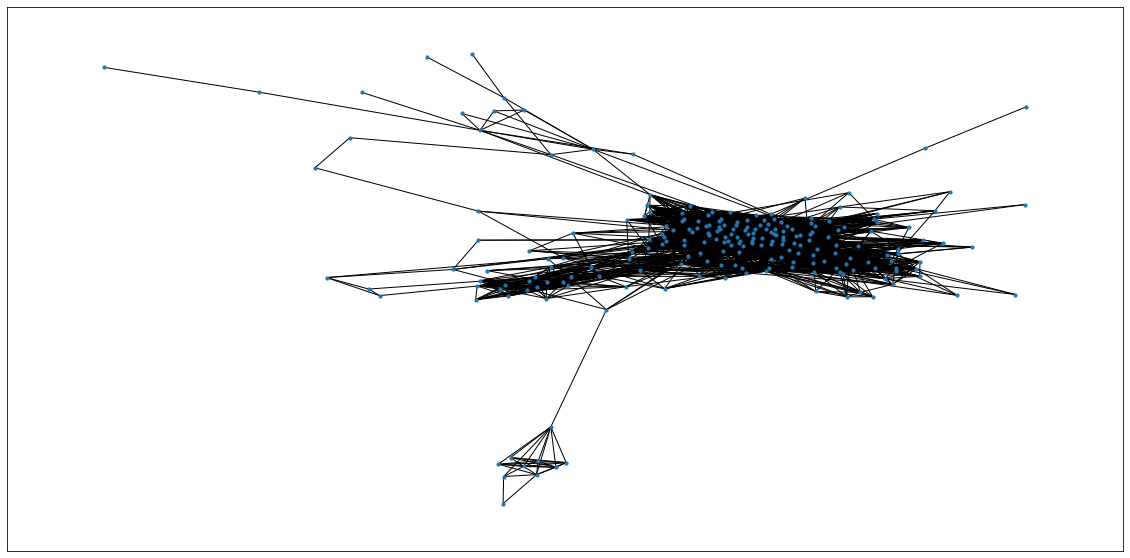

In [3]:
# Plotting the entire graph
pos = nx.spring_layout(G)
plt.figure(figsize=(20,10))
nx.draw_networkx(G, pos= pos,with_labels= False,node_size=10)

# Network Statistics

Statistics regarding structure of the network (is it connected?, is it bipartite?, etc).

In [4]:
# Summary of the graph
info = nx.info(G)
print(info)
# True if the graph is connected, false otherwise.
connected = nx.is_connected(G)
print("Network is connected?",connected)
# Returns True if graph G is bipartite, False if not.
bipartite = nx.is_bipartite(G)
print("Network is bipartite?",bipartite)
# Returns the value of the density
density = nx.density(G)
print("Network's density:",density)

Graph with 224 nodes and 3192 edges
Network is connected? True
Network is bipartite? False
Network's density: 0.12780269058295965


<ipython-input-4-7dc482ddbb4f>:2: DeprecationWarning:

info is deprecated and will be removed in version 3.0.




In [5]:
# Computation of average clustering
avg_clustering = nx.average_clustering(G)
print("Network Average Clustering: ", avg_clustering)
# Calculates average distance
avg_distance = nx.average_shortest_path_length(G)
print("Network Average distance: ", avg_distance)
# Calculates diameter
diameter = nx.diameter(G, e=None, usebounds=False)
print("Network Diameter: ", diameter)

Network Average Clustering:  0.5442814709697876
Network Average distance:  2.523462524023062
Network Diameter:  9


In [6]:
# Computes degree centrality and most influential nodes
centrality = nx.degree_centrality(G)
print(" ")
print("----------Degree centrality----------")
print(" ")
for w in sorted(centrality, key=centrality.get, reverse=True)[0:10]:
    print("Most influent node: ",w," Degree of: ", centrality[w])

# PageRank centrality and most influential nodes
centrality_page_rank = nx.pagerank(G)
print(" ")
print("----------PageRank centrality----------")
print(" ")
for w in sorted(centrality_page_rank, key=centrality_page_rank.get, reverse=True)[0:10]:
    print("Most influent node: ",w," Degree of: ", centrality_page_rank[w])

 
----------Degree centrality----------
 
Most influent node:  376  Degree of:  0.4439461883408072
Most influent node:  475  Degree of:  0.3991031390134529
Most influent node:  412  Degree of:  0.39461883408071746
Most influent node:  497  Degree of:  0.36771300448430494
Most influent node:  373  Degree of:  0.34977578475336324
Most influent node:  553  Degree of:  0.33183856502242154
Most influent node:  500  Degree of:  0.3273542600896861
Most influent node:  561  Degree of:  0.3273542600896861
Most influent node:  513  Degree of:  0.3273542600896861
Most influent node:  428  Degree of:  0.32286995515695066
 
----------PageRank centrality----------
 
Most influent node:  376  Degree of:  0.012459526742156673
Most influent node:  475  Degree of:  0.01125504671836014
Most influent node:  412  Degree of:  0.011190493517471074
Most influent node:  563  Degree of:  0.011109563695356374
Most influent node:  373  Degree of:  0.010326801315389447
Most influent node:  497  Degree of:  0.01015

## Analysis and distribution of Real Network

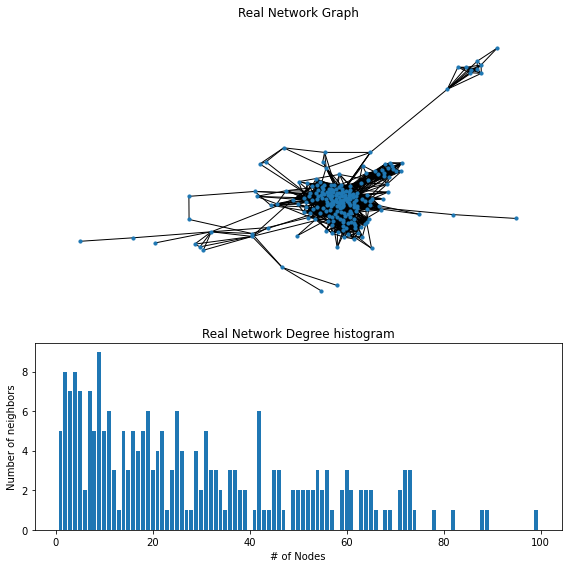

In [7]:
# Create a gridspec for adding subplots of different sizes
fig = plt.figure(figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)
# Plot the random graph with spring layout
ax0 = fig.add_subplot(axgrid[0:3, :])
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos= pos,with_labels= False, node_size=10)
ax0.set_title("Real Network Graph")
ax0.set_axis_off()
# Second plot for degree distribution
ax1 = fig.add_subplot(axgrid[3:, :])
# Create a list with the degree of random graph and sort 
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
# Returns the sorted unique elements of an array with its number of times each unique value comes up in the input array
frequency_degree = np.unique(degree_sequence, return_counts=True)
ax1.bar(*frequency_degree)
ax1.set_title("Real Network Degree histogram")
ax1.set_xlabel("# of Nodes")
ax1.set_ylabel("Number of neighbors")
fig.tight_layout()
plt.show()

# Communities

Compute the partition of the graph nodes which maximises the modularity using the Louvain heuristices (best_partition).

In [9]:
# Compute the partition, the total number of communities is equal to 7
partition = community.best_partition(G)
values = [partition.get(node) for node in G.nodes()]
df_communities = pd.DataFrame(partition, index=[0]).T.reset_index()
df_communities.columns = ["nodes", "communities"]
print("How Many communities are there? ", len(set(values)))

How Many communities are there?  7


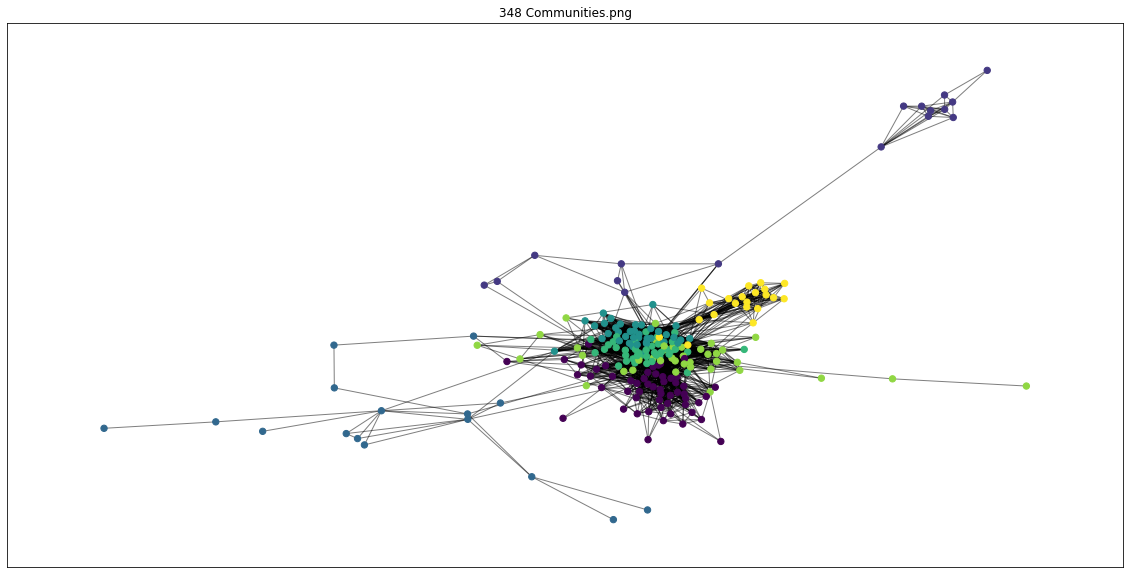

In [11]:
# Plot communities for network of node 348
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("348 Communities.png")
#plt.show()
plt.savefig("348 Communities.png")


In [31]:
#import community
#comm_mod = community.louvain_communities(G) 
#ut.draw_plotly_network(G,communities = comm_mod,kamada = False)


In [33]:
# Summary of nodes in each community created
df_communities_statistics = df_communities.groupby("communities").count().sort_values("nodes", ascending=False).reset_index()
sorted_communities = list(df_communities_statistics.communities)
df_communities_statistics["communities"] = ["Community "+str(df_communities_statistics["communities"][x]) for x in range(len(df_communities_statistics))]
df_communities_statistics

communities  nodes
0  Community 0     54
1  Community 4     39
2  Community 5     39
3  Community 3     38
4  Community 6     21
5  Community 1     17
6  Community 2     16

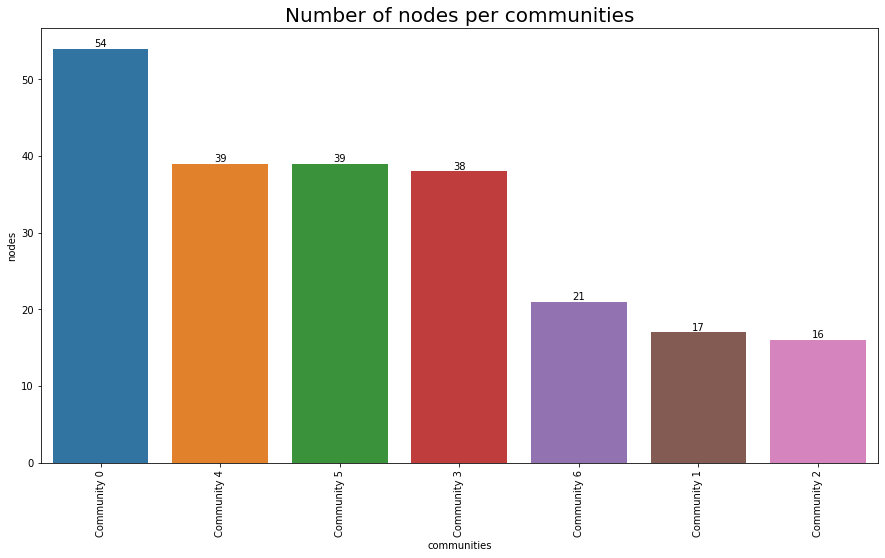

In [34]:
# Plot the number of nodes per community
plt.figure(figsize=(15,8))
ax = sns.barplot(x="communities",y="nodes", data=df_communities_statistics)
ax.bar_label(ax.containers[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Number of nodes per communities", fontsize = 20)
plt.savefig("Number of nodes per community- 348 Network Node")

# Feature analysis

In [35]:
# Importing the feature dataset with the respective anonymized names
featnames = pd.read_csv("data/348.featnames",header=None,delim_whitespace=True)
feat = pd.read_csv("data/348.feat", sep= " ", names= ["node",]+ list(range(161))).set_index("node")
feat.columns = featnames[1].to_list()
feat = feat.reset_index()


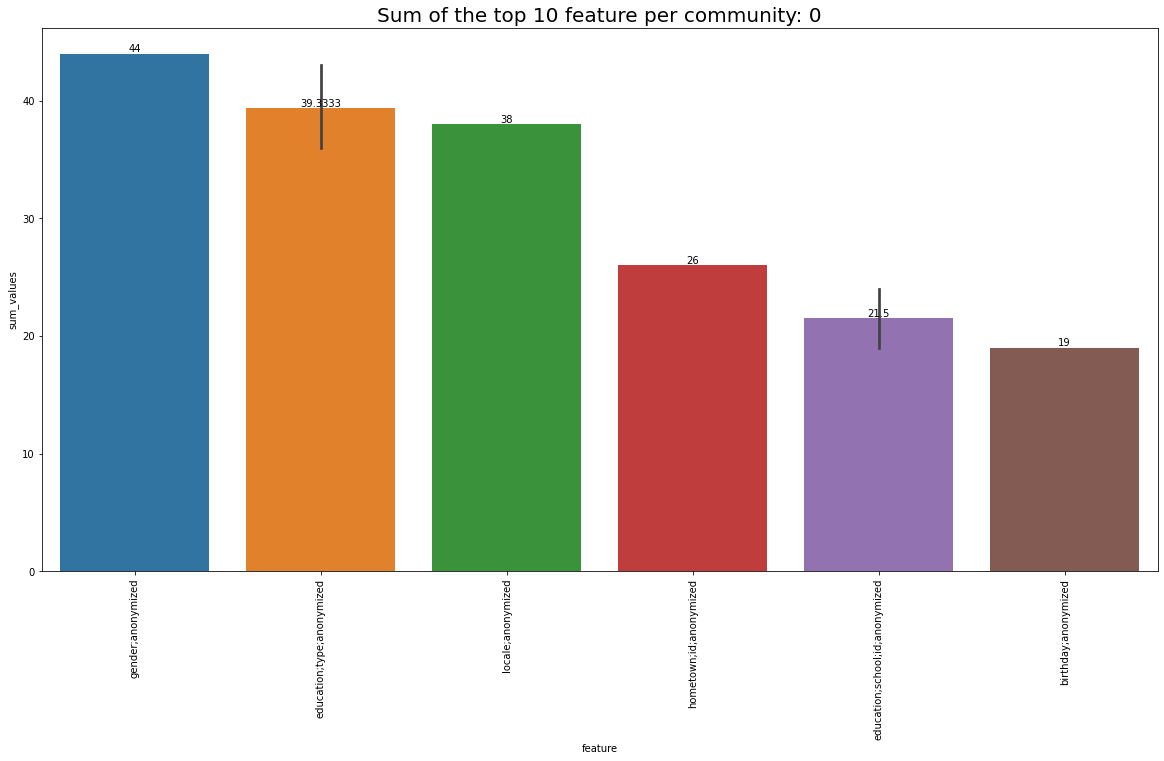

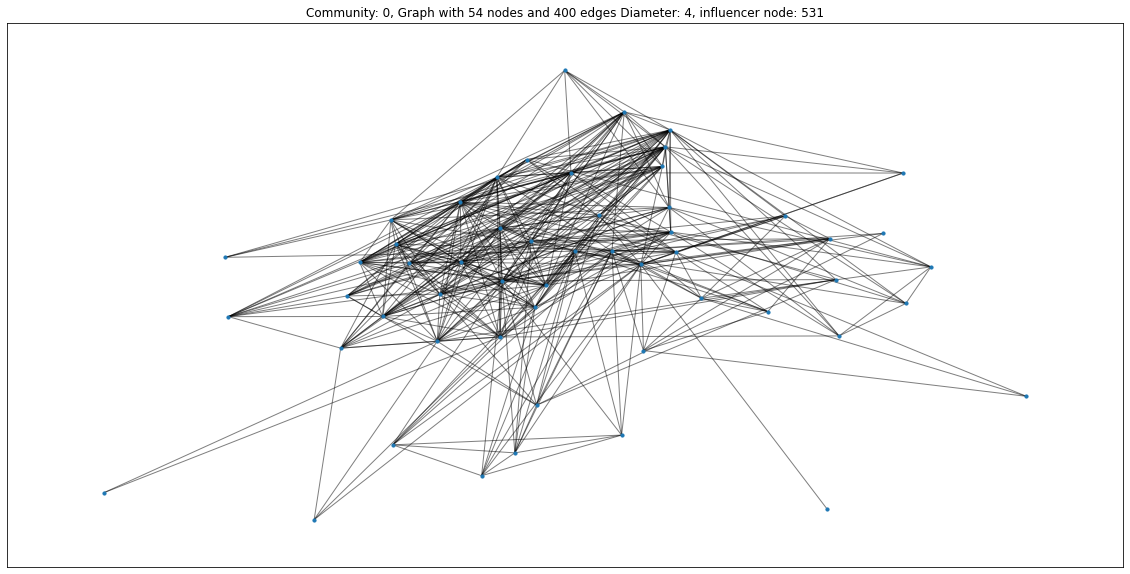

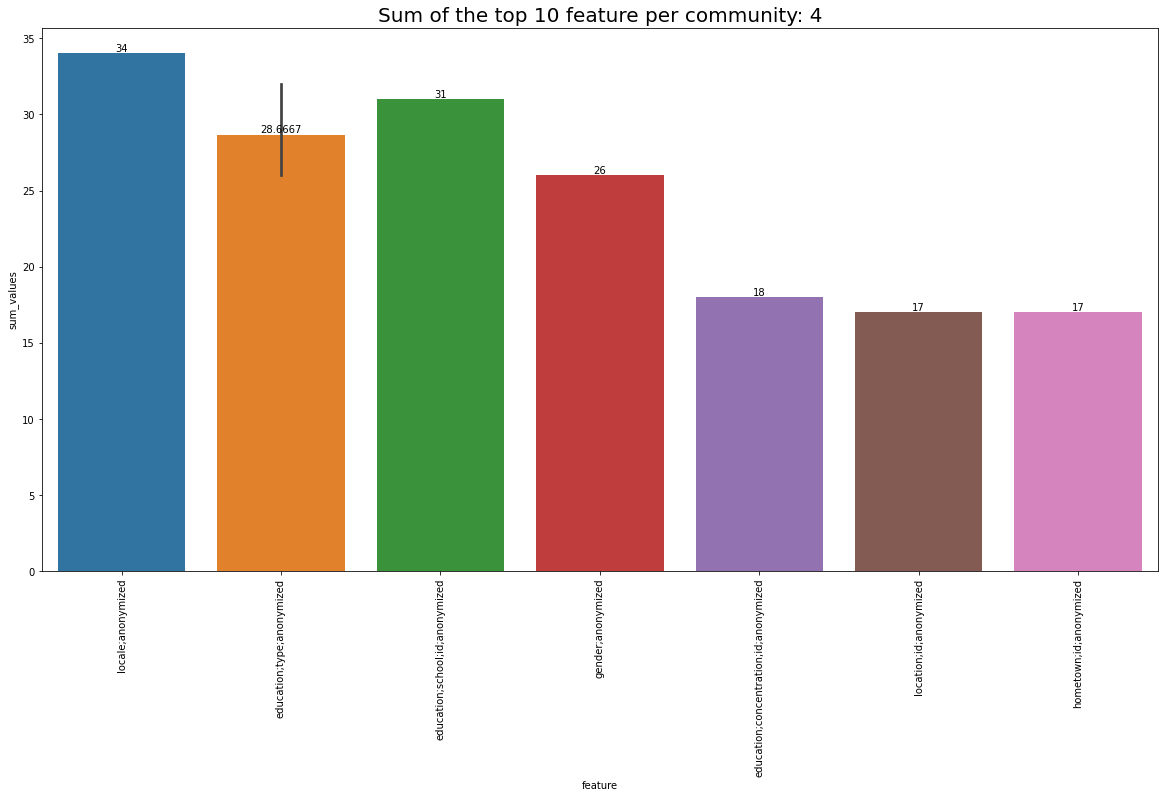

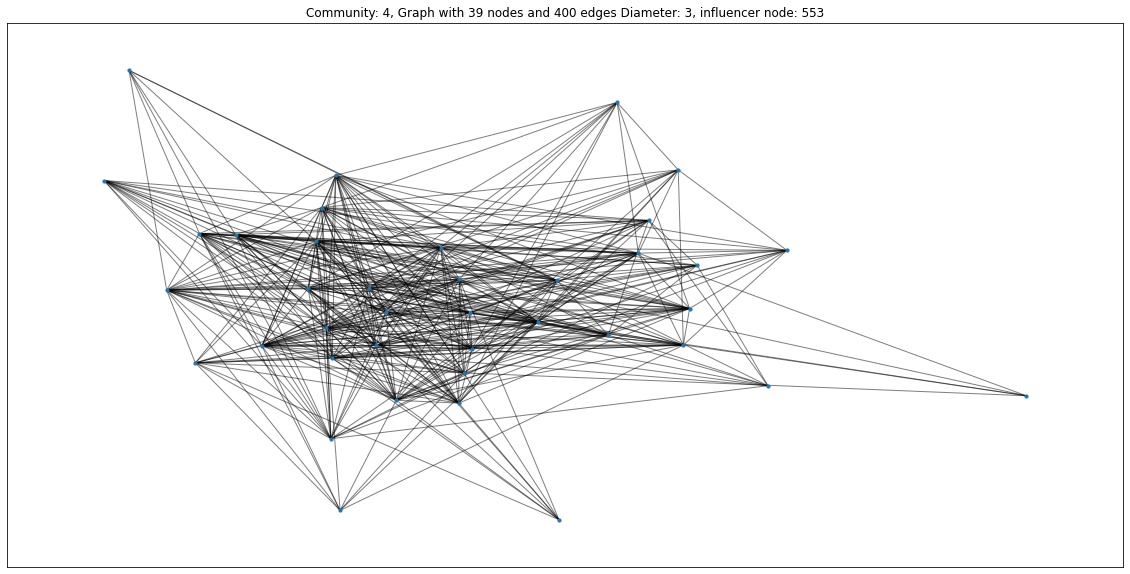

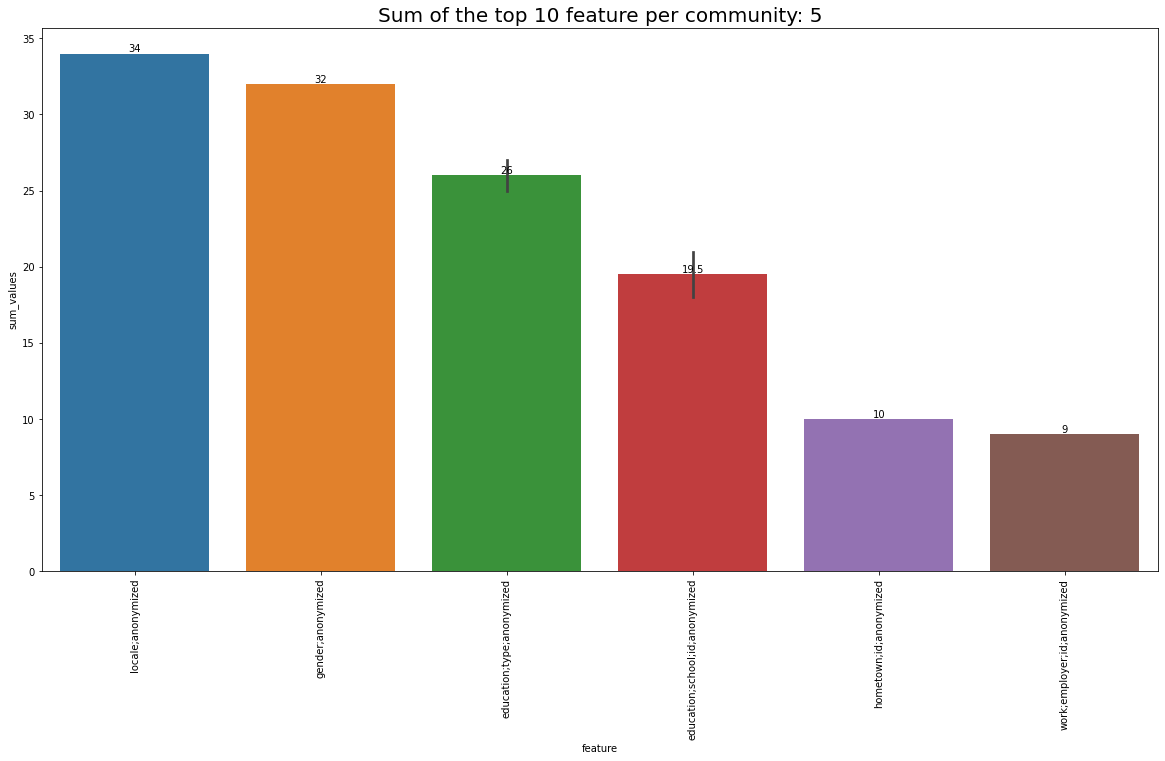

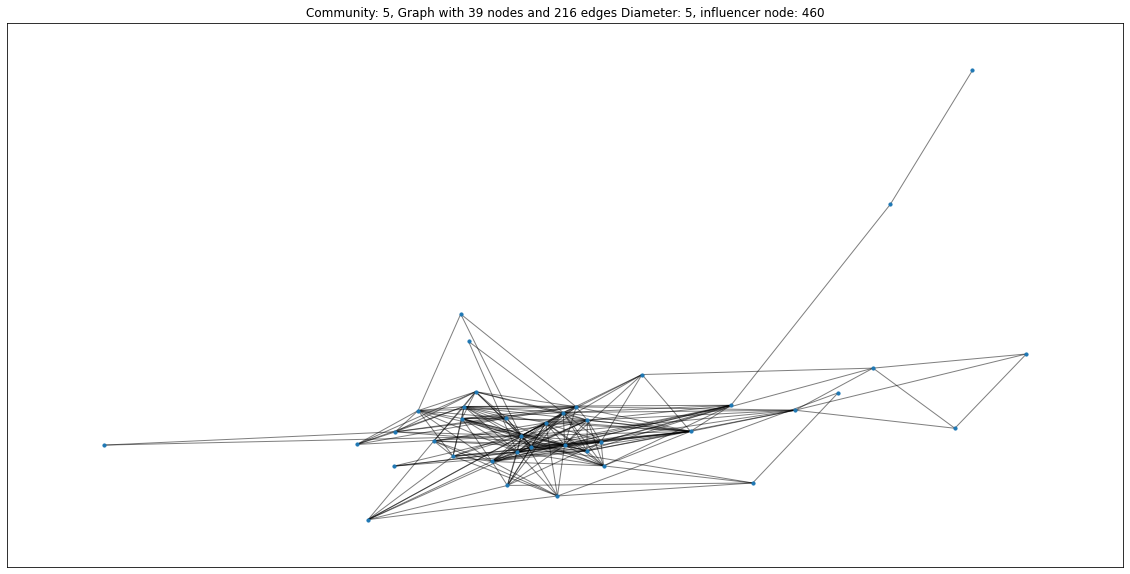

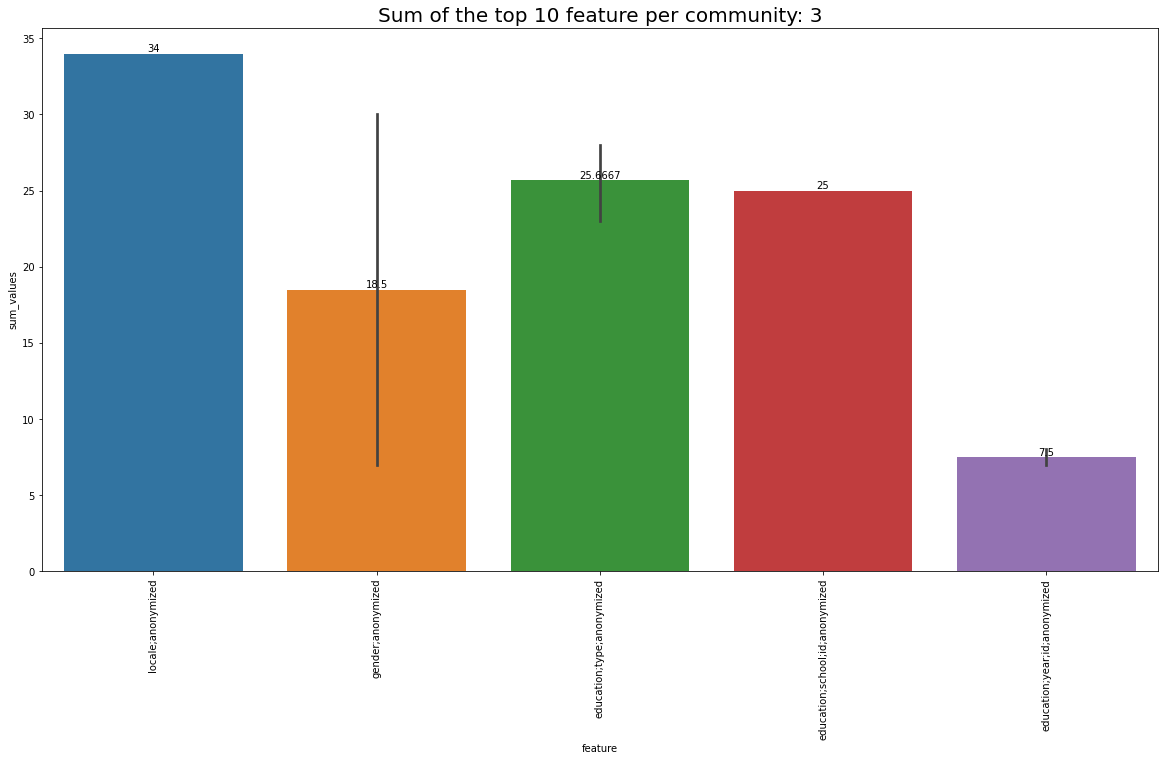

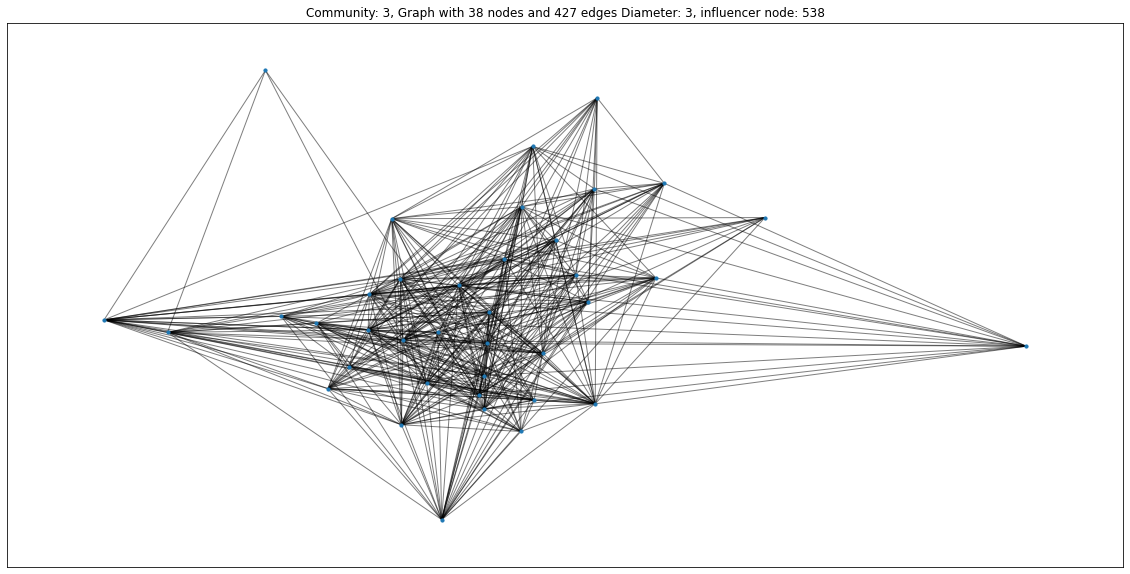

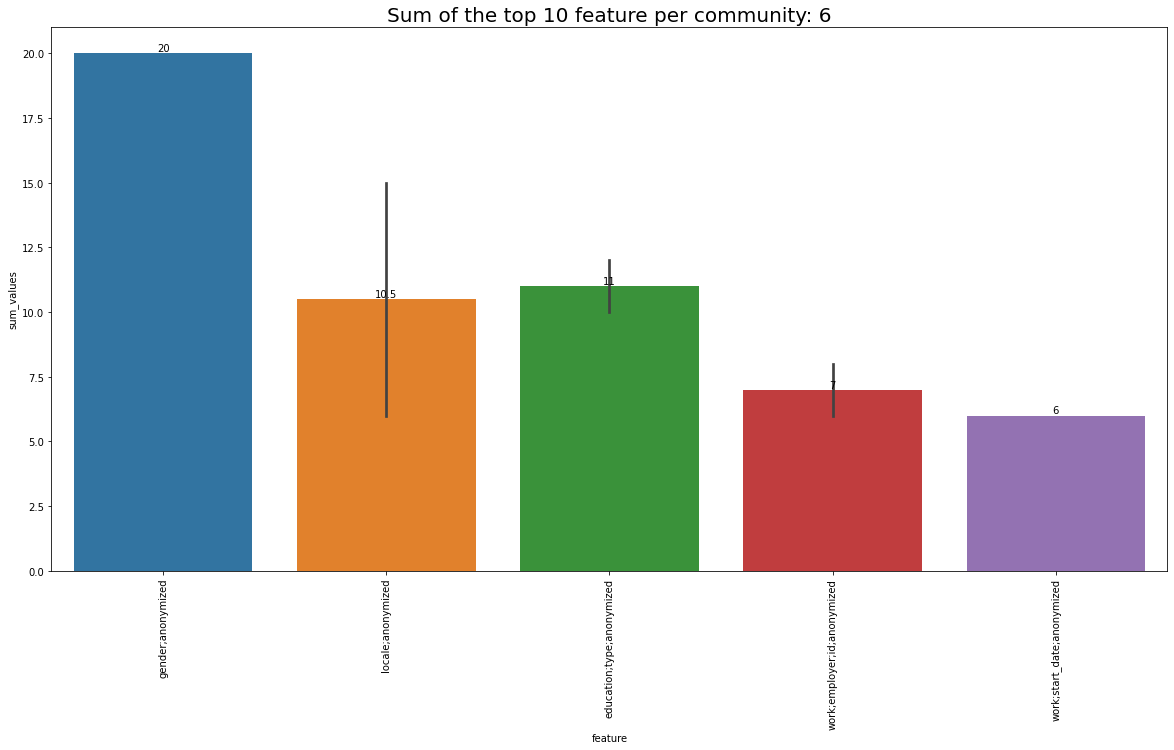

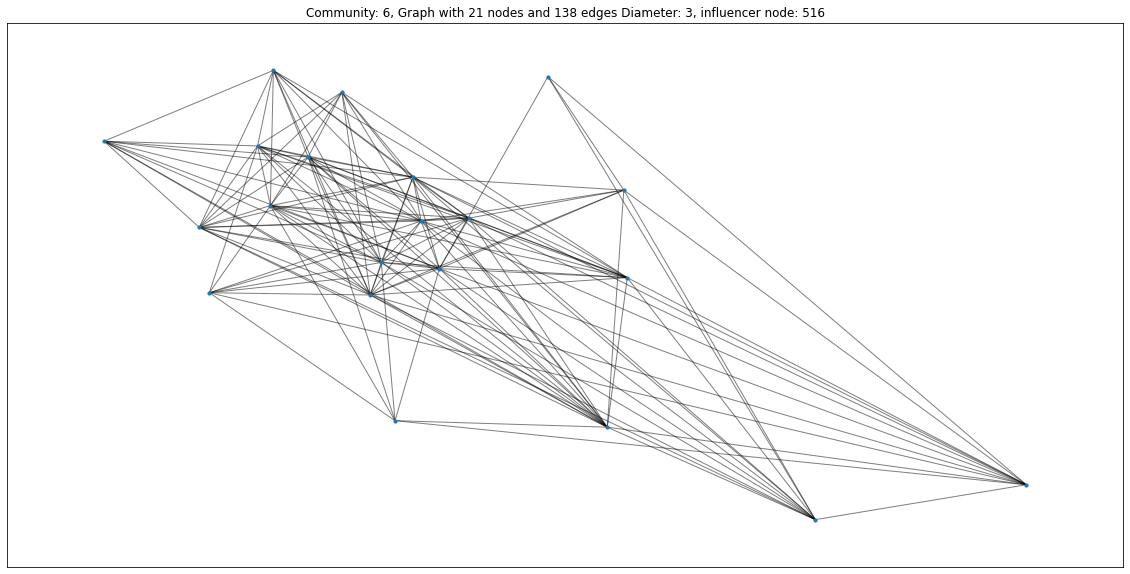

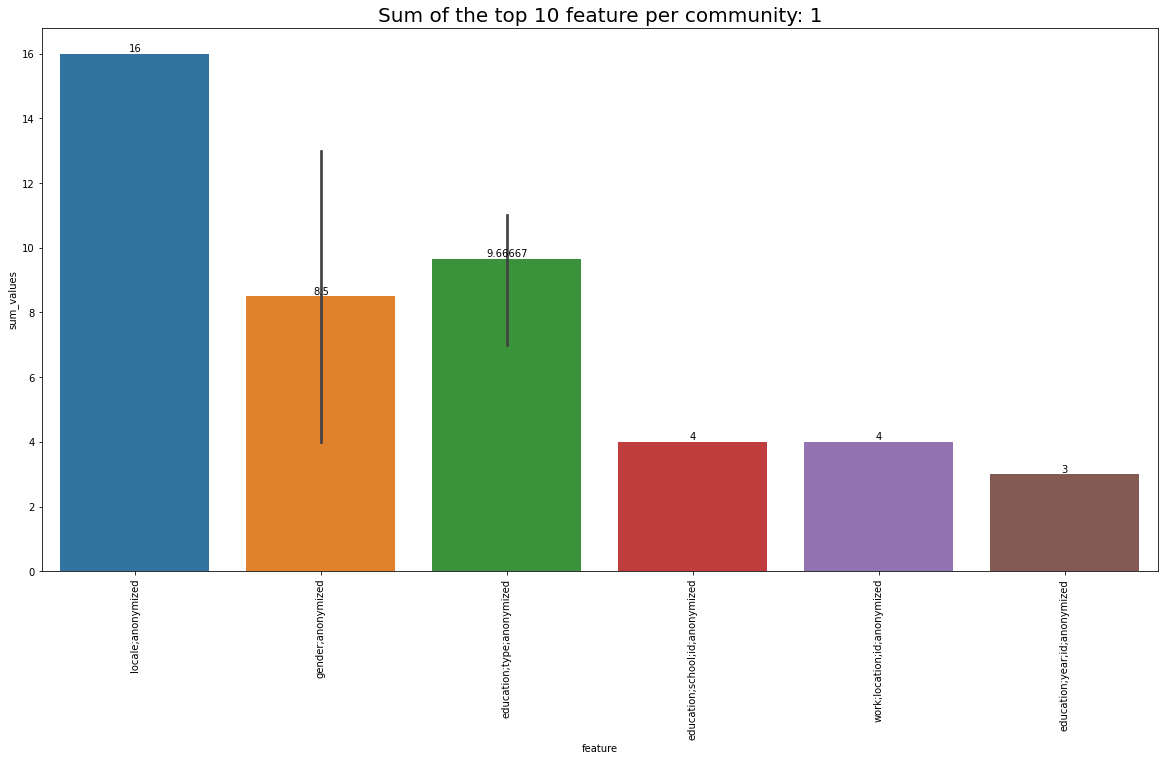

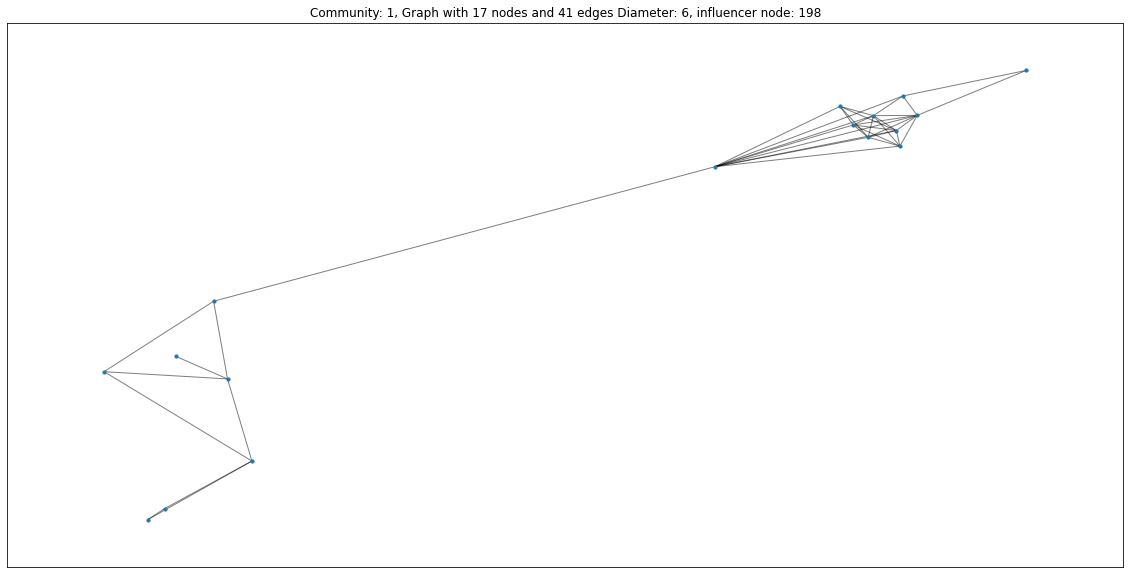

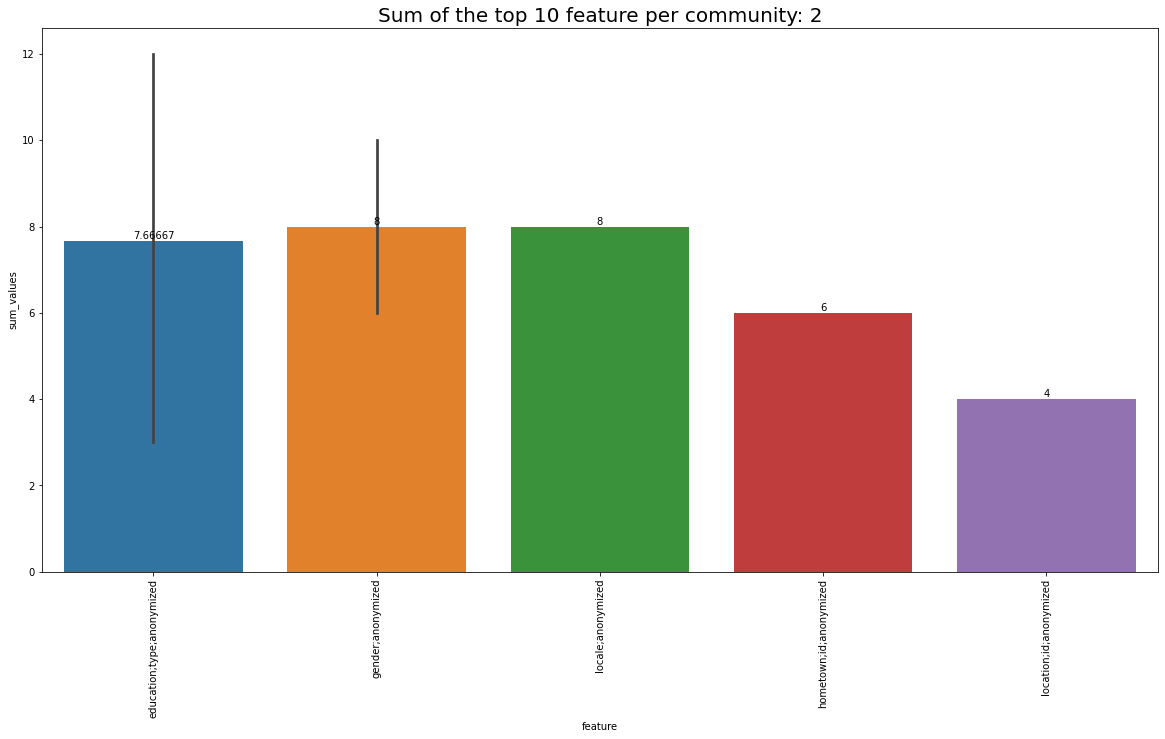

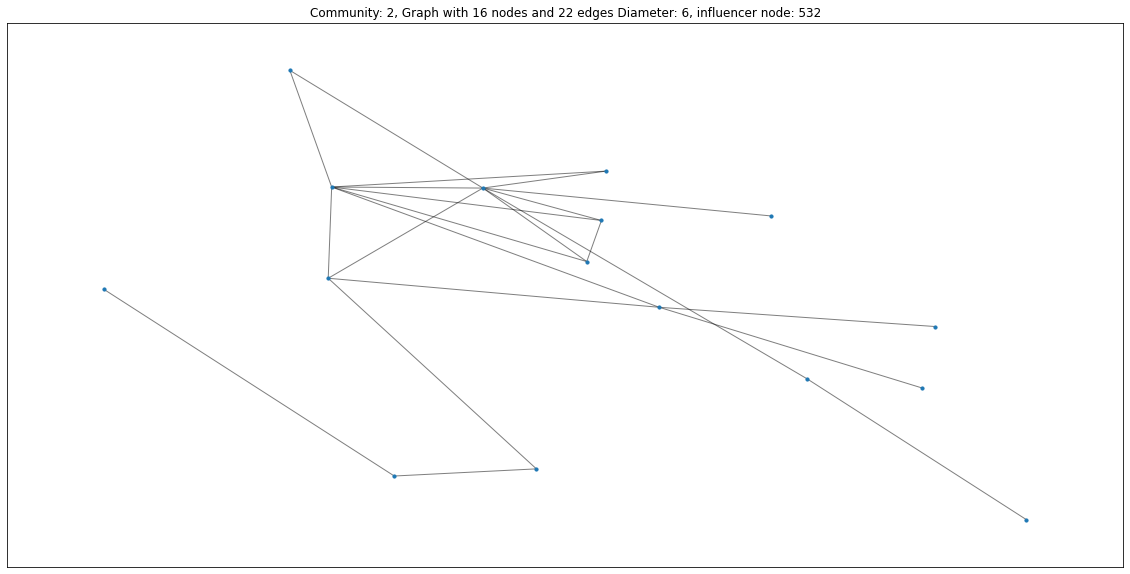

In [38]:
df_communities_statistics = ut.communities_statistics(df_communities,sorted_communities,feat,G)


In [40]:
df_communities_statistics

communities  nodes                          comm_info  comm_avg_distance  \
0            0     54  Graph with 54 nodes and 400 edges           1.847659   
1            4     39  Graph with 39 nodes and 400 edges           1.470985   
2            5     39  Graph with 39 nodes and 216 edges           1.987854   
3            3     38  Graph with 38 nodes and 427 edges           1.395448   
4            6     21  Graph with 21 nodes and 138 edges           1.357143   
5            1     17   Graph with 17 nodes and 41 edges           2.625000   
6            2     16   Graph with 16 nodes and 22 edges           2.666667   

   comm_diameter  comm_influencer  
0              4              531  
1              3              553  
2              5              460  
3              3              538  
4              3              516  
5              6              198  
6              6              532